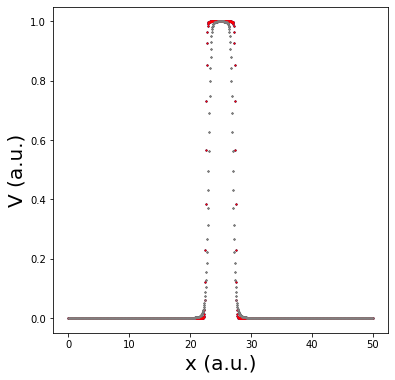

In [119]:
# %pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.markers import MarkerStyle
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


pfc=np.load("1D/pfc.npy")
Vi=np.load("1D/Vinitial.npy")
Vs=np.load("1D/Vdynamics.npy")

t=100
Dt=2

color=['black', 'grey','red','blue','green','orange']#cm.Blues(np.linspace(0.4,1,10))

fig=plt.figure(figsize=(6,6))

# plt.scatter(pfc[0],Vi,c='black',s=5)
# plt.scatter(pfc[0],Vs[1],c='gray',s=5)
# plt.scatter(pfc[0],Vs[2],c='red',s=5)

#plt.ylim([0,np.max(Vi)])

for i in range(0,6):
    #fig=plt.figure(figsize=(2,2))
    plt.scatter(pfc[0],Vs[-i*200],color=color[-i],label=r"$t_{1}$",s=1)
    #plt.ylim([0,np.max(Vs[i])])
#for i in range(10):
#    figure(figsize=(2,2))
#    scatter(pfc[0],Vs[i*20],label=r"$t_{1}$",c='black',s=5)
#    ylim([0,np.max(Vs)])
    plt.xlabel("x (a.u.)", fontsize=20)
    plt.ylabel("V (a.u.)", fontsize=20)
#savefig("1D.svg")
#legend()

500
20.0


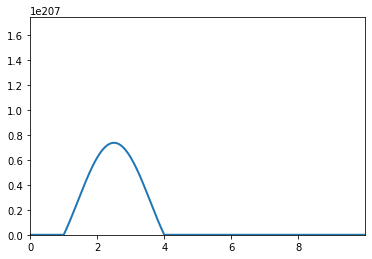

In [93]:
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim( [np.min(pfc[0]), np.max(pfc[0])] )
ax.set_ylim( [0., np.max(Vs)] )
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = pfc[0]
    y = Vs[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
duration=10 # in sec
fps = 30
frames = np.arange(0,len(Vs),10)
interval=duration*1000/len(frames)

print(len(frames))
print(interval)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=interval, blit=True)

anim.save('basic_animation.mp4', extra_args=['-vcodec', 'libx264']) #fps=30, 

plt.show()

In [6]:
# create folder for video frames
import os
if not os.path.exists("videotemp"):
    os.makedirs("videotemp")
# loads data
pfc1D=load("1D/pfc.npy")
Vs1D=load("1D/Vdynamics.npy")
# generates and saves frames
for i in range(len(Vs1D)):
    fig=plt.figure(figsize=(15,5))
    subplot(1,1,1)
    scatter(pfc1D[0],Vs1D[i],c='k')
    title("1D", fontsize=20)
    xlabel("X", fontsize=20)
    ylabel("activity (a.u.)", fontsize=20)
    plt.xticks([], [])
    plt.yticks([], [])
        
    tight_layout()
    if i < 10:
        savefig("videotemp/frame00"+str(i+1)+".png")
    if i >= 10 and i < 100:
        savefig("videotemp/frame0"+str(i+1)+".png")
    else:
        savefig("videotemp/frame"+str(i+1)+".png")
    plt.close()
    